In [1]:
 # This is a code cell
import numpy as np

from matplotlib.pyplot import Axes, tight_layout, subplots_adjust, suptitle, plot, subplot, axes, minorticks_on, xlabel, ylabel, legend, title, rc, figure, axvline, axhline, axvline, annotate, text, annotate, xticks 


import matplotlib.pyplot as plt

from scipy.integrate import quad, nquad
from scipy import integrate


from matplotlib import pyplot as plt 


from scipy.fft import fft, fftfreq

from mpl_toolkits import mplot3d
from scipy import fft
from scipy.special import kn

import sympy as sy


In [32]:
N=10

w0=1.32*10**14
wa=0.8*w0
wc=1.75*10**14
gamma0=4.28*10**13


#Normalization

w0_n=1.32*10**14/wa
wc_n=wc/wa
gamma0_n=gamma0/wa

wa_n=1


Omega=0.001 #units of wa

alpha_n=1 #units of wa


ome=np.linspace(100,1000,N)

time_n=np.linspace(500,505,N) #units of twa
time2_n=np.linspace(500,505,N) #units of twa

time=np.linspace(0,500,N) #units of twa
time2=np.linspace(0,500,N) #units of twa


ome=np.linspace(100,150,N)
time=np.linspace(100,150,N)
time2=np.linspace(100,150,N)


#wa=wa/wa
#gamma0=2

In [3]:
print(w0_n)
print(wc_n)
print(wa_n)
print(gamma0_n)

1.25
1.6571969696969697
1
0.4053030303030303


In [19]:
def gamma(time,gamma0, alpha):
    return gamma0*(2+np.sin(time*alpha))/2

def numerator(omega, time2,time,wa,wc,gamma0,alpha):
    return np.exp(1j*(omega-wa)*(time-time2))*omega**4*wc**2*np.sqrt(gamma(time,gamma0,alpha))*np.sqrt(gamma(time2,gamma0,alpha))

def deno1(omega,time2,time,gamma0,alpha,w0,wc):
    return np.sqrt(((omega**2-w0**2)**2+gamma(time,gamma0,alpha)*omega**2+wc**2*(omega**2-w0**2+1j*gamma(time,gamma0,alpha)))*((omega**2-w0**2)**2+gamma(time2,gamma0,alpha)**2*omega**2))

def deno2(omega,time2,time, gamma0,alpha,w0,wc):
    return np.sqrt(((omega**2-w0**2)**2+gamma(time2,gamma0,alpha)*omega**2+wc**2*(omega**2-w0**2-1j*gamma(time2,gamma0,alpha)))*((omega**2-w0**2)**2+gamma(time,gamma0,alpha)**2*omega**2))

def inte1(omega,time2,time,gamma0,alpha,w0,wc,wa):
    return numerator(omega,time2,time,wa,wc,gamma0,alpha)/(deno1(omega,time2,time,gamma0,alpha,w0,wc)+deno2(omega, time2,time,gamma0,alpha,w0,wc))

def integrand(omega,time2,time,gamma0,alpha,w0,wc,wa):
    return inte1(omega,time2,time,gamma0,alpha,w0,wc,wa)+np.conjugate(inte1(omega,time2,time,gamma0,alpha,w0,wc,wa))

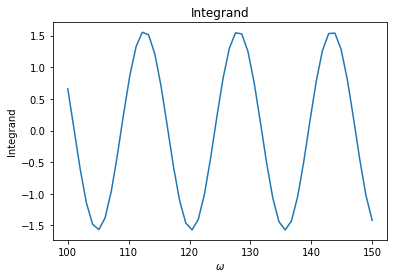

In [28]:
integ=np.zeros(N)

for i in range(len(ome)):
    #print(i)
    integ[i]=np.real(integrand(ome[i], time2_n[49],time_n[45],gamma0_n,alpha_n,w0_n,wc_n,wa_n))

    
plt.plot(ome,integ)                                                                                                                                                                                                     
plt.ylabel('Integrand')
plt.xlabel('$\omega$')
plt.title('Integrand')
plt.show()
            

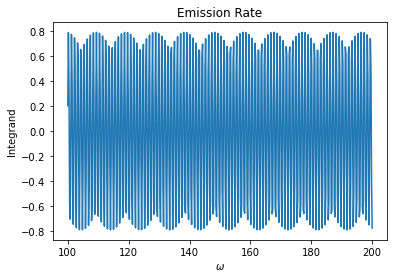

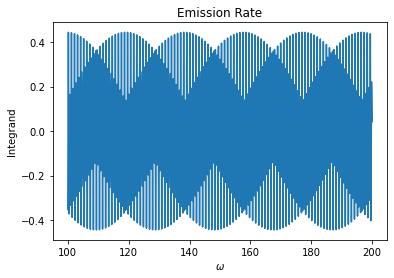

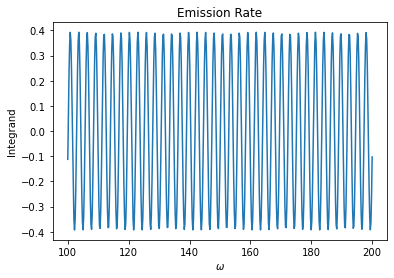

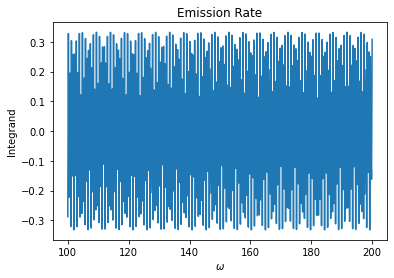

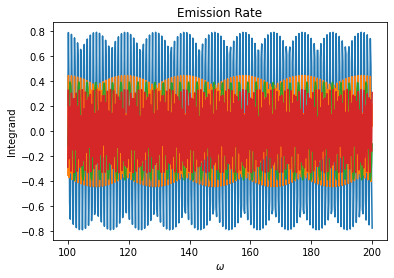

In [21]:

integ_t1=np.zeros(N)
integ_t2=np.zeros(N)
integ_t3=np.zeros(N)
integ_t4=np.zeros(N)

for i in range(len(ome)):
    #print(i)
    integ_t1[i]=np.real(integrand(ome[i], time2_n[120],time_n[20],gamma0_n,alpha_n,w0_n,wc_n,wa_n))
    integ_t2[i]=np.real(integrand(ome[i], time2_n[150],time_n[100],gamma0_n,alpha_n,w0_n,wc_n,wa_n))
    integ_t3[i]=np.real(integrand(ome[i], time2_n[200],time_n[10],gamma0_n,alpha_n,w0_n,wc_n,wa_n))
    integ_t4[i]=np.real(integrand(ome[i], time2_n[200],time_n[400],gamma0_n,alpha_n,w0_n,wc_n,wa_n))
    
plt.plot(ome,integ_t1)
plt.ylabel('Integrand')
plt.xlabel('$\omega$')
plt.title('Emission Rate')
plt.show()

plt.plot(ome,integ_t2)
plt.ylabel('Integrand')
plt.xlabel('$\omega$')
plt.title('Emission Rate')
plt.show()

plt.plot(ome,integ_t3)
plt.ylabel('Integrand')
plt.xlabel('$\omega$')
plt.title('Emission Rate')
plt.show()

plt.plot(ome,integ_t4)
plt.ylabel('Integrand')
plt.xlabel('$\omega$')
plt.title('Emission Rate')
plt.show()



plt.plot(ome,integ_t1)
plt.plot(ome,integ_t2)
plt.plot(ome,integ_t3)
plt.plot(ome,integ_t4)
plt.ylabel('Integrand')
plt.xlabel('$\omega$')
plt.title('Emission Rate')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:465: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)


0
1
2
3
4
5
6
7
8
9


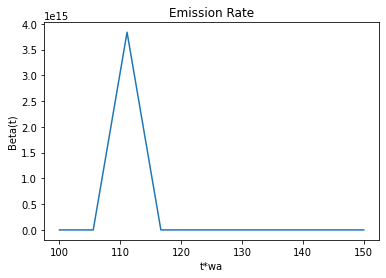

In [34]:
Int_final_2=[]

for i in range(len(time)):
    test,err=nquad(integrand,[[0,np.inf],[0,time[i]]],args=(time_n[i],gamma0_n,alpha_n,w0_n,wc_n,wa_n))
    print(i)
    Int_final_2.append(test)
    
#60 pyos -- int_-inf to t with time variation
plt.plot(time,Int_final_2)
plt.ylabel('Beta(t)')
plt.xlabel('t*wa')
plt.title('Emission Rate')
plt.show()